In [34]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Creates Pandas Dataframes, Gen Info about Dataframes
carbon_dioxide_df = pd.read_csv('Data/UN Global Carbon Dioxide Data.csv')
methane_df = pd.read_csv('Data/UN Global Methane Data.csv') # Main DataFrame read from file

print(f"Carbon Dioxide: {carbon_dioxide_df.columns}")
print(f"Methane Data: {methane_df.columns}\n")

# Num. of Countries/Years
print(f"Carbon Dioxide")
print(f"Years: {carbon_dioxide_df['Year'].min()}-{carbon_dioxide_df['Year'].max()}")
print(f"Countries: {len(carbon_dioxide_df['Country or Area'].unique())}")
print(f"Average Emissions: {round(carbon_dioxide_df['Value'].mean(),2)} ± {round(carbon_dioxide_df['Value'].std(),2)}")

print(f"\nMethane")
print(f"Years: {methane_df['Year'].min()}-{methane_df['Year'].max()}")
print(f"Countries: {len(methane_df['Country or Area'].unique())}")
print(f"Average Emissions: {round(methane_df['Value'].mean(),2)} ± {round(methane_df['Value'].std(),2)}")

Carbon Dioxide: Index(['Country or Area', 'Year', 'Value'], dtype='object')
Methane Data: Index(['Country or Area', 'Year', 'Value'], dtype='object')

Carbon Dioxide
Years: 1990-2021
Countries: 43
Average Emissions: 409119.07 ± 994921.46

Methane
Years: 1990-2021
Countries: 43
Average Emissions: 62773.23 ± 146335.63


In [36]:
# How many countries out of 43 have data from 1990-2021
print(f"Carbon Dioxide\n1990:{len(carbon_dioxide_df[carbon_dioxide_df['Year']==1990])}"
      f"\n2020:{len(carbon_dioxide_df[carbon_dioxide_df['Year']==2020])}"
      f"\n2021:{len(carbon_dioxide_df[carbon_dioxide_df['Year']==2021])}")

print(f"\nMethane\n1990:{len(methane_df[methane_df['Year']==1990])}"
      f"\n2020:{len(methane_df[methane_df['Year']==2020])}"
      f"\n2021:{len(methane_df[methane_df['Year']==2021])}")

# One country does not have data for 2021 for either carbon dioxide or methane, so will remove 2021 years and only work with 1990-2020


Carbon Dioxide
1990:43
2020:43
2021:42

Methane
1990:43
2020:43
2021:42


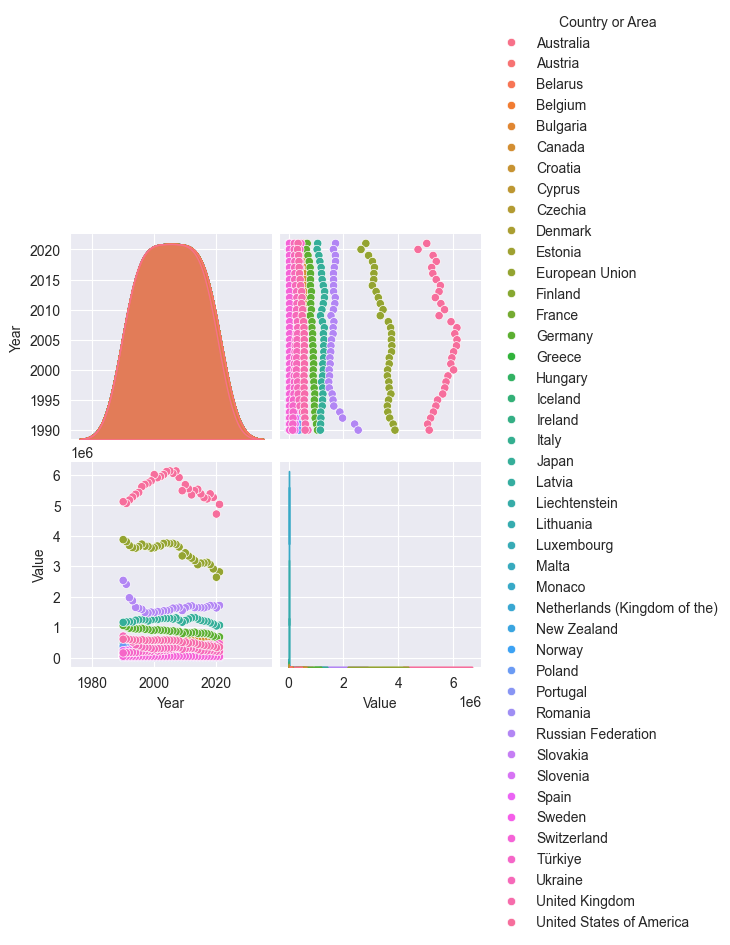

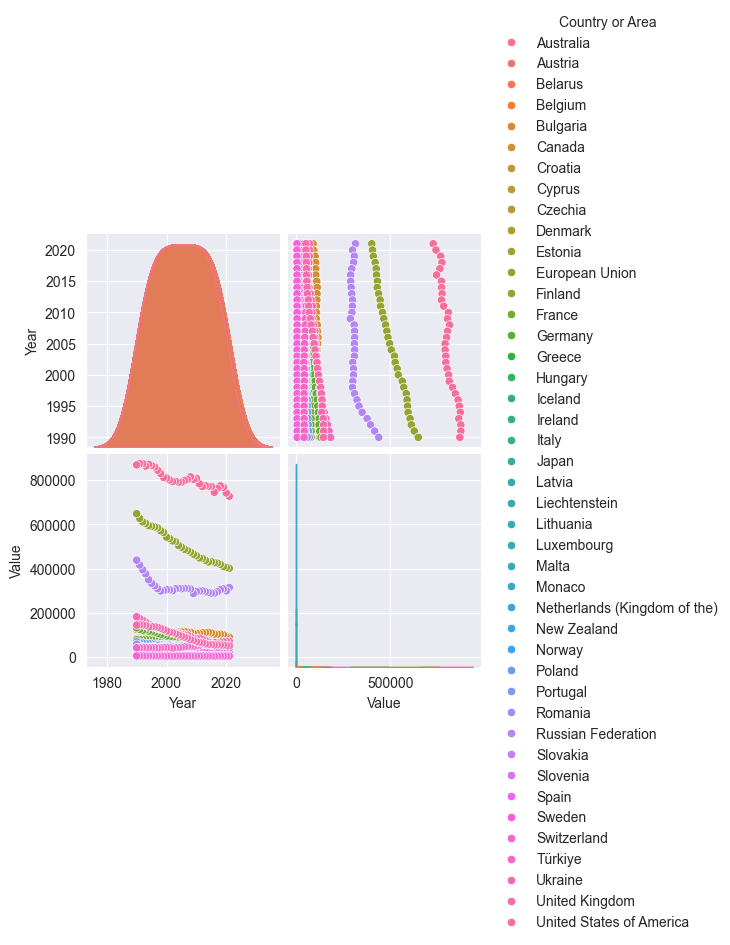

In [10]:
# Carbon Dioxide and Methane pairplots for obvious trends
sns.pairplot(carbon_dioxide_df, hue='Country or Area')
sns.pairplot(methane_df, hue='Country or Area')
plt.show()

# Year x Value seems to show most obvious trends

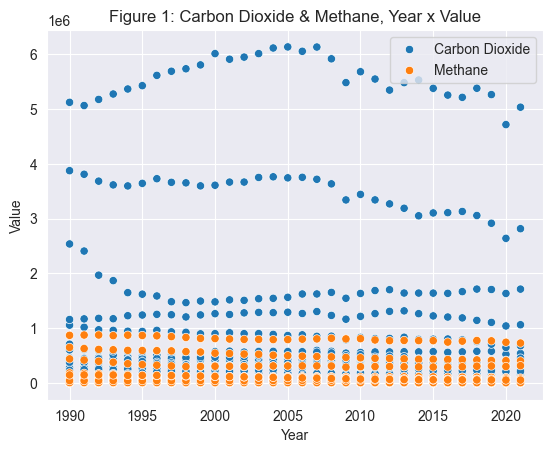

<Figure size 640x480 with 0 Axes>

In [38]:
# Plots of Year x Value for CO and Methane
carbon_dioxide_df['type'] = 'Carbon Dioxide'
methane_df['type'] = 'Methane'
both_data = pd.concat([carbon_dioxide_df, methane_df])

plt.figure()
sns.scatterplot(data=both_data, x='Year', y='Value', hue='type')
plt.legend(loc='upper right')
plt.title('Figure 1: Carbon Dioxide & Methane, Year x Value')
plt.show()
plt.savefig('Figures/Figure 1: Carbon Dioxide & Methane, Year x Value.jpeg')


# Expanded Plot
#sns.scatterplot(data=both_data, x='Year', y='Value', hue='type')
#plt.legend(loc='upper right')
#plt.ylim(0,7)
#plt.show()

#plt.scatter(carbon_dioxide_df['Year'], carbon_dioxide_df['Value'])
#plt.title('Carbon Dioxide Data')
#plt.xlabel('Year')
#plt.ylabel('Value')
#plt.show()


In [39]:
carbon_dioxide_df = carbon_dioxide_df[(carbon_dioxide_df['Year']==1990) | (carbon_dioxide_df['Year']==2020)]
methane_df = methane_df[(methane_df['Year']==1990) | (methane_df['Year']==2020)]

In [42]:
# New Dataframe with countries and their average emissions for both CO2 and Methane
country_area = pd.Series(carbon_dioxide_df['Country or Area'].unique())
carbon_dioxide_change = []
methane_change = []


cd_country_area = (carbon_dioxide_df['Country or Area'].unique()).tolist()
me_country_area = (methane_df['Country or Area'].unique()).tolist()
# print(cd_country_area==me_country_area) # True, Same list of countries
# print(len(cd_country_area)) # 43


for i in range(len(cd_country_area)): # Repeating code, so probably could spend time to increase efficiency
    # Carbon Dioxide
    cd = pd.DataFrame(carbon_dioxide_df[carbon_dioxide_df['Country or Area']==cd_country_area[i]])
    cd_test_1990 = cd['Year'] == 1990
    cd_test_2020 = cd['Year'] == 2020
    carbon_dioxide_change.append(cd[cd_test_2020].Value.values[0] - cd[cd_test_1990].Value.values[0])
    # Methane
    me = pd.DataFrame(methane_df[methane_df['Country or Area']==me_country_area[i]])
    me_test_1990 = me['Year'] == 1990
    me_test_2020 = me['Year'] == 2020
    methane_change.append(me[me_test_2020].Value.values[0] - me[me_test_1990].Value.values[0])


# Makes combined DataFrame
direction = {'Country or Area': country_area, 'CD Change': carbon_dioxide_change, 'Methane Change': methane_change}
combined_df = pd.DataFrame(direction)
# print(combined_df.head())

  Country or Area      CD Change  Methane Change
0       Australia  122179.310304   -27829.514240
1         Austria     -45.908260    -4815.943162
2         Belarus  -49289.504156    -3092.254597
3         Belgium  -29191.411971    -4928.378565
4        Bulgaria  -40104.372430    -8224.977067


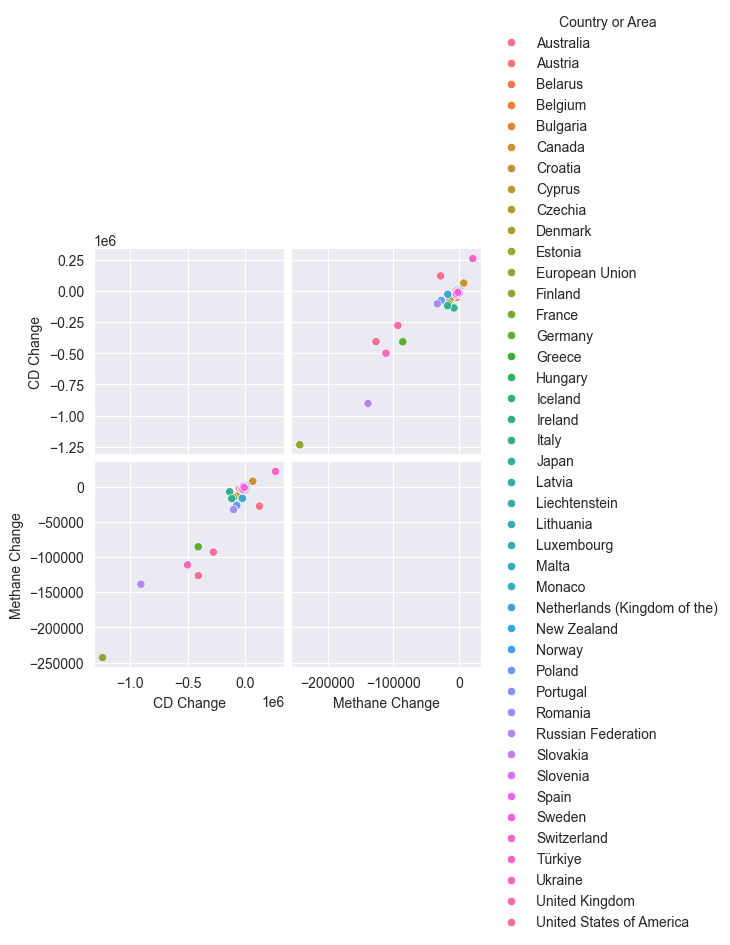

In [16]:
sns.pairplot(combined_df, hue='Country or Area')
plt.show()